In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('img1.jpg')

In [29]:
def distansse(point,type_distance):
    tab=[]

    x1,y1,z1=point
    for i in range(len(vecteur)):
        x2,y2,z2=vecteur[i]
        if type_distance==1:
            tab.append( ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**(1/2) )
    return tab.index(min(tab))


def calcule_centres(img,img2):
    w,h,_=img.shape
    for i in range(len(vecteur)):
        val1,val2,val3=0,0,0
        cnt=0
        for p1 in range(w):
            for p2 in range(h):
                if img2[p1,p2]==i:
                    val1+=img[p1,p2][0]
                    val2+=img[p1,p2][1]
                    val3+=img[p1,p2][2]
                    cnt+=1
        if cnt!=0:
            val1=val1//cnt
            val2=val2//cnt
            val3=val3//cnt
        else:
            val1=0
            val2=0
            val3=0

        vecteur[i]=val1,val2,val3
        
def kmeans(img,k):
    state=True
    max_itiration=100
    nbr_itiration=0
    global vecteur
    vecteur=[]
    w,h,_=img.shape
    print(w,h)
    
    if w*h>k:  # number of informations (pixels) greater than number of classes
        
        
        j1,j2=0,0
        while ((j1<w) and (j2<h) and (len(vecteur)<k)):
            if list(img[j2,j1]) not in (vecteur):
                vecteur.append(list(img[j2,j1]))
            j2+=1
            if j2==w:
                j2=0
                j1+=1
        
        img2=np.zeros((w,h),np.uint8)
        img3=np.zeros((w,h),np.uint8)

        while (state and nbr_itiration<max_itiration):

            for i in range(w):
                for j in range(h):
                    img3=img2.copy()
                    img2[i,j]=distansse(img[i,j],1)
                
            calcule_centres(img,img2)

            if  nbr_itiration!=0:

                temp_state=True
                ii,jj=0,0
                while(jj<h and temp_state):
                    if img2[ii,jj]!=img3[ii,jj]:
                        temp_state=False
                    ii+=1
                    if ii==w:
                        jj+=1
                        ii=0

                if temp_state:
                    state=False

            nbr_itiration+=1
        
        img_res=img.copy()
        for i in range(w):
            for j in range(h):
                img_res[i,j]=vecteur[img2[i,j]]  
        print(vecteur)
        

        return img_res
    else:
        return None

In [35]:
res=kmeans(img,4)

50 50
[(96, 96, 96), (253, 252, 252), (231, 143, 145), (85, 85, 254)]
/home/abdou/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


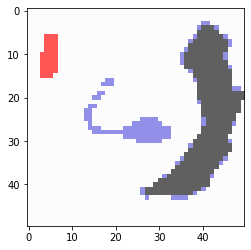

In [40]:
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res)
plt.show()

In [41]:
cv2.imwrite("res.jpg", res)


True